In [68]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, when

def load_csv_data(spark, file_path):
    return spark.read.csv(file_path, header=True, inferSchema=True)

def initial_data_overview(df):
    # Get the number of rows and columns
    num_rows = df.count()
    num_cols = len(df.columns)
    print(f"Dataset dimensions: {num_rows} rows, {num_cols} columns")

    # Display schema
    print("\nDataset Schema:")
    df.printSchema()

    # Display a few sample records
    print("\nSample Records:")
    df.show(5, truncate=False)

    # Check for missing values
    print("\nMissing Value Count per Column:")
    df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

    # Display summary statistics for numeric columns
    print("\nSummary Statistics for Numeric Columns:")
    df.describe().show()

    # Display unique counts for categorical columns
    categorical_columns = [field.name for field in df.schema.fields if field.dataType.simpleString() == 'string']
    if categorical_columns:
        print("\nUnique Value Counts for Categorical Columns:")
        for col_name in categorical_columns:
            unique_count = df.select(col_name).distinct().count()
            print(f"{col_name}: {unique_count} unique values")

# Create a Spark session
spark = SparkSession.builder.appName("PredictiveMaintenance").getOrCreate()

# Load the CSV file
# Replace 'path/to/your/integrated_dataset.csv' with the actual path to your CSV file
csv_file_path = 'C:/Users/KhanhChang/PycharmProjects/Predictive-Maintenance-System-using-Apache-Spark/Datasets/integrated_data.csv'
integrated_df = load_csv_data(spark, csv_file_path)

# Call the function
initial_data_overview(integrated_df)

# Remember to stop the Spark session when you're done
spark.stop()

Dataset dimensions: 4380000 rows, 40 columns

Dataset Schema:
root
 |-- equipment_id: integer (nullable = true)
 |-- timestamp: timestamp (nullable = true)
 |-- temperature: double (nullable = true)
 |-- vibration: double (nullable = true)
 |-- pressure: double (nullable = true)
 |-- rotational_speed: double (nullable = true)
 |-- power_output: double (nullable = true)
 |-- noise_level: double (nullable = true)
 |-- voltage: double (nullable = true)
 |-- current: double (nullable = true)
 |-- oil_viscosity: double (nullable = true)
 |-- model: string (nullable = true)
 |-- manufacturer: string (nullable = true)
 |-- installation_date: timestamp (nullable = true)
 |-- max_temperature: double (nullable = true)
 |-- max_pressure: double (nullable = true)
 |-- max_rotational_speed: double (nullable = true)
 |-- expected_lifetime_years: double (nullable = true)
 |-- warranty_period_years: integer (nullable = true)
 |-- last_major_overhaul: timestamp (nullable = true)
 |-- location: string (

In [81]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, when, isnan, isnull, min, max
from pyspark.sql.types import NumericType, TimestampType, DateType

def load_csv_data(spark, file_path):
    return spark.read.csv(file_path, header=True, inferSchema=True)

def check_missing_values(df):
    print("Missing Values Check:")
    
    for c in df.columns:
        column_type = df.schema[c].dataType
        if isinstance(column_type, NumericType):
            # For numeric columns, check for null, NaN, and infinity
            null_count = df.filter(col(c).isNull() | isnan(col(c)) | col(c).isin([float('inf'), float('-inf')])).count()
        elif isinstance(column_type, (TimestampType, DateType)):
            # For date and timestamp columns, only check for null
            null_count = df.filter(col(c).isNull()).count()
        else:
            # For other types (string, boolean, etc.), check for null and empty string
            null_count = df.filter(col(c).isNull() | (col(c) == "")).count()
        
        print(f"{c}: {null_count} missing values")

def identify_duplicates(df):
    total_records = df.count()
    distinct_records = df.distinct().count()
    duplicates = total_records - distinct_records
    print(f"\nDuplicate Records Check:")
    print(f"Total Records: {total_records}")
    print(f"Distinct Records: {distinct_records}")
    print(f"Duplicate Records: {duplicates}")

def verify_data_types(df):
    print("\nData Types Verification:")
    for field in df.schema.fields:
        print(f"{field.name}: {field.dataType}")

def examine_numerical_ranges(df):
    print("\nNumerical Columns Range:")
    numeric_columns = [field.name for field in df.schema.fields 
                       if isinstance(field.dataType, NumericType)]
    
    if numeric_columns:
        df.select([min(col(c)).alias(f"{c}_min") for c in numeric_columns] +
                  [max(col(c)).alias(f"{c}_max") for c in numeric_columns]) \
          .show(truncate=False)
    else:
        print("No numerical columns found in the dataset.")

def data_quality_assessment(df):
    print("Data Quality Assessment")
    print("=======================")
    
    check_missing_values(df)
    identify_duplicates(df)
    verify_data_types(df)
    examine_numerical_ranges(df)

# Create a Spark session
spark = SparkSession.builder.appName("PredictiveMaintenance").getOrCreate()

# Load the CSV file
# Replace 'path/to/your/integrated_dataset.csv' with the actual path to your CSV file
csv_file_path = 'C:/Users/KhanhChang/PycharmProjects/Predictive-Maintenance-System-using-Apache-Spark/Datasets/integrated_data.csv'
integrated_df = load_csv_data(spark, csv_file_path)

# Perform data quality assessment
data_quality_assessment(integrated_df)

# Stop the Spark session
spark.stop()

ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "C:\Users\KhanhChang\AppData\Local\Programs\Python\Python312\Lib\site-packages\py4j\clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
                          ^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: reentrant call inside <_io.BufferedReader name=4344>

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\KhanhChang\AppData\Local\Programs\Python\Python312\Lib\site-packages\py4j\java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\KhanhChang\AppData\Local\Programs\Python\Python312\Lib\site-packages\py4j\clientserver.py", line 539, in send_command
    raise Py4JNetworkError(
py4j.protocol.Py4JNetworkError: Error while sending or receiving
ERROR:root:Exception while sending command.
Traceb

Py4JError: An error occurred while calling o6348.csv

In [72]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, count

def create_spark_session():
    return SparkSession.builder \
        .appName("MissingValuesInvestigation") \
        .getOrCreate()

def investigate_missing_values(spark, csv_file_path):
    # Load the CSV file
    df = spark.read.csv(csv_file_path, header=True, inferSchema=True)

    # Columns with missing values
    columns_with_missing = ['production_rate', 'operating_hours', 'downtime_hours', 'operator_id', 
                            'product_type', 'raw_material_quality', 'ambient_temperature', 
                            'ambient_humidity', 'operation_date']
    
    # Create a binary column for missing values
    for column in columns_with_missing:
        df = df.withColumn(f"{column}_is_missing", when(col(column).isNull(), 1).otherwise(0))
    
    print("Consistency of missing values across columns:")
    df.groupBy(*[f"{column}_is_missing" for column in columns_with_missing]) \
      .count() \
      .show()
    
    print("\nDistribution of missing values across equipment_id:")
    df.groupBy("equipment_id") \
      .agg(*[count(when(col(c).isNull(), c)).alias(f"{c}_missing") for c in columns_with_missing]) \
      .show()
    
    print("\nDistribution of missing values over time:")
    df.groupBy("timestamp") \
      .agg(*[count(when(col(c).isNull(), c)).alias(f"{c}_missing") for c in columns_with_missing]) \
      .orderBy("timestamp") \
      .show()

# Create a new Spark session
spark = create_spark_session()

# Replace with the actual path to your CSV file
csv_file_path = 'C:/Users/KhanhChang/PycharmProjects/Predictive-Maintenance-System-using-Apache-Spark/Datasets/integrated_data.csv'

try:
    investigate_missing_values(spark, csv_file_path)
finally:
    # Stop the Spark session
    spark.stop()

Consistency of missing values across columns:
+--------------------------+--------------------------+-------------------------+----------------------+-----------------------+-------------------------------+------------------------------+---------------------------+-------------------------+-------+
|production_rate_is_missing|operating_hours_is_missing|downtime_hours_is_missing|operator_id_is_missing|product_type_is_missing|raw_material_quality_is_missing|ambient_temperature_is_missing|ambient_humidity_is_missing|operation_date_is_missing|  count|
+--------------------------+--------------------------+-------------------------+----------------------+-----------------------+-------------------------------+------------------------------+---------------------------+-------------------------+-------+
|                         0|                         0|                        0|                     0|                      0|                              0|                             0| 

In [73]:
from pyspark.sql import SparkSession, Window
from pyspark.sql.functions import col, when, count, min, max, datediff, lag, avg


def create_spark_session():
    return SparkSession.builder \
        .appName("IdentifyMissingPeriods") \
        .getOrCreate()

def identify_missing_periods(spark, csv_file_path):
    # Load the CSV file
    df = spark.read.csv(csv_file_path, header=True, inferSchema=True)

    # Columns with missing values
    columns_with_missing = ['production_rate', 'operating_hours', 'downtime_hours', 'operator_id', 
                            'product_type', 'raw_material_quality', 'ambient_temperature', 
                            'ambient_humidity', 'operation_date']

    # Create a column that indicates if any of the operational data is missing
    missing_condition = when(col(columns_with_missing[0]).isNull(), True)
    for column in columns_with_missing[1:]:
        missing_condition = missing_condition | col(column).isNull()
    
    df_with_missing_flag = df.withColumn("is_missing", missing_condition)

    # Group by equipment_id and find contiguous periods of missing data
    window_spec = Window.partitionBy("equipment_id").orderBy("timestamp")
    df_with_periods = df_with_missing_flag \
        .withColumn("change_in_missing", 
                    (col("is_missing") != lag("is_missing", 1).over(window_spec)).cast("int")) \
        .withColumn("period_id", sum("change_in_missing").over(window_spec))

    # Aggregate to get the start and end times of each missing period
    missing_periods = df_with_periods \
        .filter(col("is_missing") == True) \
        .groupBy("equipment_id", "period_id") \
        .agg(
            min("timestamp").alias("start_time"),
            max("timestamp").alias("end_time"),
            count("*").alias("duration_points")
        ) \
        .withColumn("duration_days", datediff(col("end_time"), col("start_time")))

    # Show the results
    print("Periods with Missing Operational Data:")
    missing_periods.orderBy("equipment_id", "start_time").show(truncate=False)

    # Summarize missing periods
    print("\nSummary of Missing Periods:")
    missing_periods.agg(
        count("*").alias("total_missing_periods"),
        min("duration_days").alias("min_duration_days"),
        max("duration_days").alias("max_duration_days"),
        avg("duration_days").alias("avg_duration_days")
    ).show()

# Create a new Spark session
spark = create_spark_session()

# Replace with the actual path to your CSV file
csv_file_path = 'C:/Users/KhanhChang/PycharmProjects/Predictive-Maintenance-System-using-Apache-Spark/Datasets/integrated_data.csv'

try:
    identify_missing_periods(spark, csv_file_path)
finally:
    # Stop the Spark session
    spark.stop()

Periods with Missing Operational Data:
+------------+---------+-----------------------+-----------------------+---------------+-------------+
|equipment_id|period_id|start_time             |end_time               |duration_points|duration_days|
+------------+---------+-----------------------+-----------------------+---------------+-------------+
|1           |NULL     |2024-10-09 01:33:50.434|2024-10-09 01:33:50.434|1              |0            |
|1           |0        |2024-10-09 07:33:50.434|2024-10-09 07:33:50.434|1              |0            |
|2           |NULL     |2024-10-09 01:33:50.434|2024-10-09 01:33:50.434|1              |0            |
|2           |0        |2024-10-09 07:33:50.434|2024-10-09 07:33:50.434|1              |0            |
|3           |NULL     |2024-10-09 01:33:50.434|2024-10-09 01:33:50.434|1              |0            |
|3           |0        |2024-10-09 07:33:50.434|2024-10-09 07:33:50.434|1              |0            |
|4           |NULL     |2024-10-09

In [76]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

def create_spark_session():
    return SparkSession.builder \
        .appName("RemoveRowsWithNulls") \
        .getOrCreate()

def load_data(spark, file_path):
    return spark.read.csv(file_path, header=True, inferSchema=True)

def remove_null_rows(df):
    return df.dropna()

def count_rows(df):
    return df.count()

def main():
    spark = create_spark_session()
    
    try:
        # Load data
        file_path = 'C:/Users/KhanhChang/PycharmProjects/Predictive-Maintenance-System-using-Apache-Spark/Datasets/integrated_data.csv'
        df = load_data(spark, file_path)
        
        initial_count = count_rows(df)
        print(f"Initial row count: {initial_count}")
        
        # Remove rows with null values
        df_cleaned = remove_null_rows(df)
        
        final_count = count_rows(df_cleaned)
        print(f"Row count after removing nulls: {final_count}")
        
        rows_removed = initial_count - final_count
        print(f"Number of rows removed: {rows_removed}")
        
        # Show a sample of the cleaned data
        print("\nSample of cleaned data:")
        df_cleaned.show(5)
        
        print("\nRows with missing values have been removed from the DataFrame.")
        print("Note: The changes are only in memory. The original CSV file remains unchanged.")
        
    finally:
        spark.stop()

if __name__ == "__main__":
    main()

Initial row count: 4380000
Row count after removing nulls: 4378000
Number of rows removed: 2000

Sample of cleaned data:
+------------+--------------------+-----------+----------+---------+----------------+------------+-----------+---------+----------+-------------+----------+-------------+--------------------+---------------+------------+--------------------+-----------------------+---------------------+--------------------+---------+-----------+----------------+--------------------+-------------+--------------+---------+--------------+------------------+--------------------+---------------+------------------+------------------+-----------+------------+--------------------+-------------------+----------------+--------------------+----------------------+
|equipment_id|           timestamp|temperature| vibration| pressure|rotational_speed|power_output|noise_level|  voltage|   current|oil_viscosity|     model| manufacturer|   installation_date|max_temperature|max_pressure|max_rotational_

In [78]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, mean, stddev, min, max, percentile_approx
from pyspark.sql.types import NumericType, StringType

def create_spark_session():
    return SparkSession.builder \
        .appName("DescriptiveStatistics") \
        .getOrCreate()

def load_data(spark, file_path):
    return spark.read.csv(file_path, header=True, inferSchema=True)

def remove_null_rows(df):
    return df.dropna()

def calculate_numerical_stats(df):
    numeric_columns = [f.name for f in df.schema.fields if isinstance(f.dataType, NumericType)]
    
    stats_exprs = []
    for c in numeric_columns:
        stats_exprs.extend([
            mean(col(c)).alias(f"{c}_mean"),
            percentile_approx(col(c), 0.5).alias(f"{c}_median"),
            stddev(col(c)).alias(f"{c}_stddev"),
            min(col(c)).alias(f"{c}_min"),
            max(col(c)).alias(f"{c}_max")
        ])
    
    stats = df.select(stats_exprs)
    return stats

def calculate_categorical_freq(df):
    categorical_columns = [f.name for f in df.schema.fields if isinstance(f.dataType, StringType)]
    
    freq_dists = {}
    for column in categorical_columns:
        freq_dist = df.groupBy(column).agg(count("*").alias("count")) \
                      .orderBy("count", ascending=False)
        freq_dists[column] = freq_dist
    
    return freq_dists

def main():
    spark = create_spark_session()
    
    try:
        # Load data
        file_path = 'C:/Users/KhanhChang/PycharmProjects/Predictive-Maintenance-System-using-Apache-Spark/Datasets/integrated_data.csv'
        df = load_data(spark, file_path)
        
        # Remove rows with null values
        df_cleaned = remove_null_rows(df)
        
        print(f"Number of rows after removing nulls: {df_cleaned.count()}")
        
        # Calculate numerical statistics
        numerical_stats = calculate_numerical_stats(df_cleaned)
        
        print("\nNumerical Statistics:")
        numerical_stats.show(truncate=False)
        
        # Calculate categorical frequency distributions
        categorical_freq_dists = calculate_categorical_freq(df_cleaned)
        
        print("\nCategorical Frequency Distributions:")
        for column, freq_dist in categorical_freq_dists.items():
            print(f"\n{column}:")
            freq_dist.show(10, truncate=False)  # Show top 10 categories
        
    finally:
        spark.stop()

if __name__ == "__main__":
    main()

Number of rows after removing nulls: 4378000

Numerical Statistics:
+-----------------+-------------------+-------------------+----------------+----------------+------------------+------------------+------------------+---------------+---------------+------------------+----------------+-------------------+-------------+-------------+-----------------+---------------+------------------+------------+------------+---------------------+-----------------------+-----------------------+--------------------+--------------------+------------------+-------------------+-------------------+----------------+----------------+-----------------+------------------+------------------+---------------+---------------+------------------+--------------+------------------+-----------+-----------+------------------+--------------+-----------------+-----------+-----------+------------------+--------------------+--------------------+-----------------+-----------------+--------------------+----------------------+

Displaying histograms for numerical features...


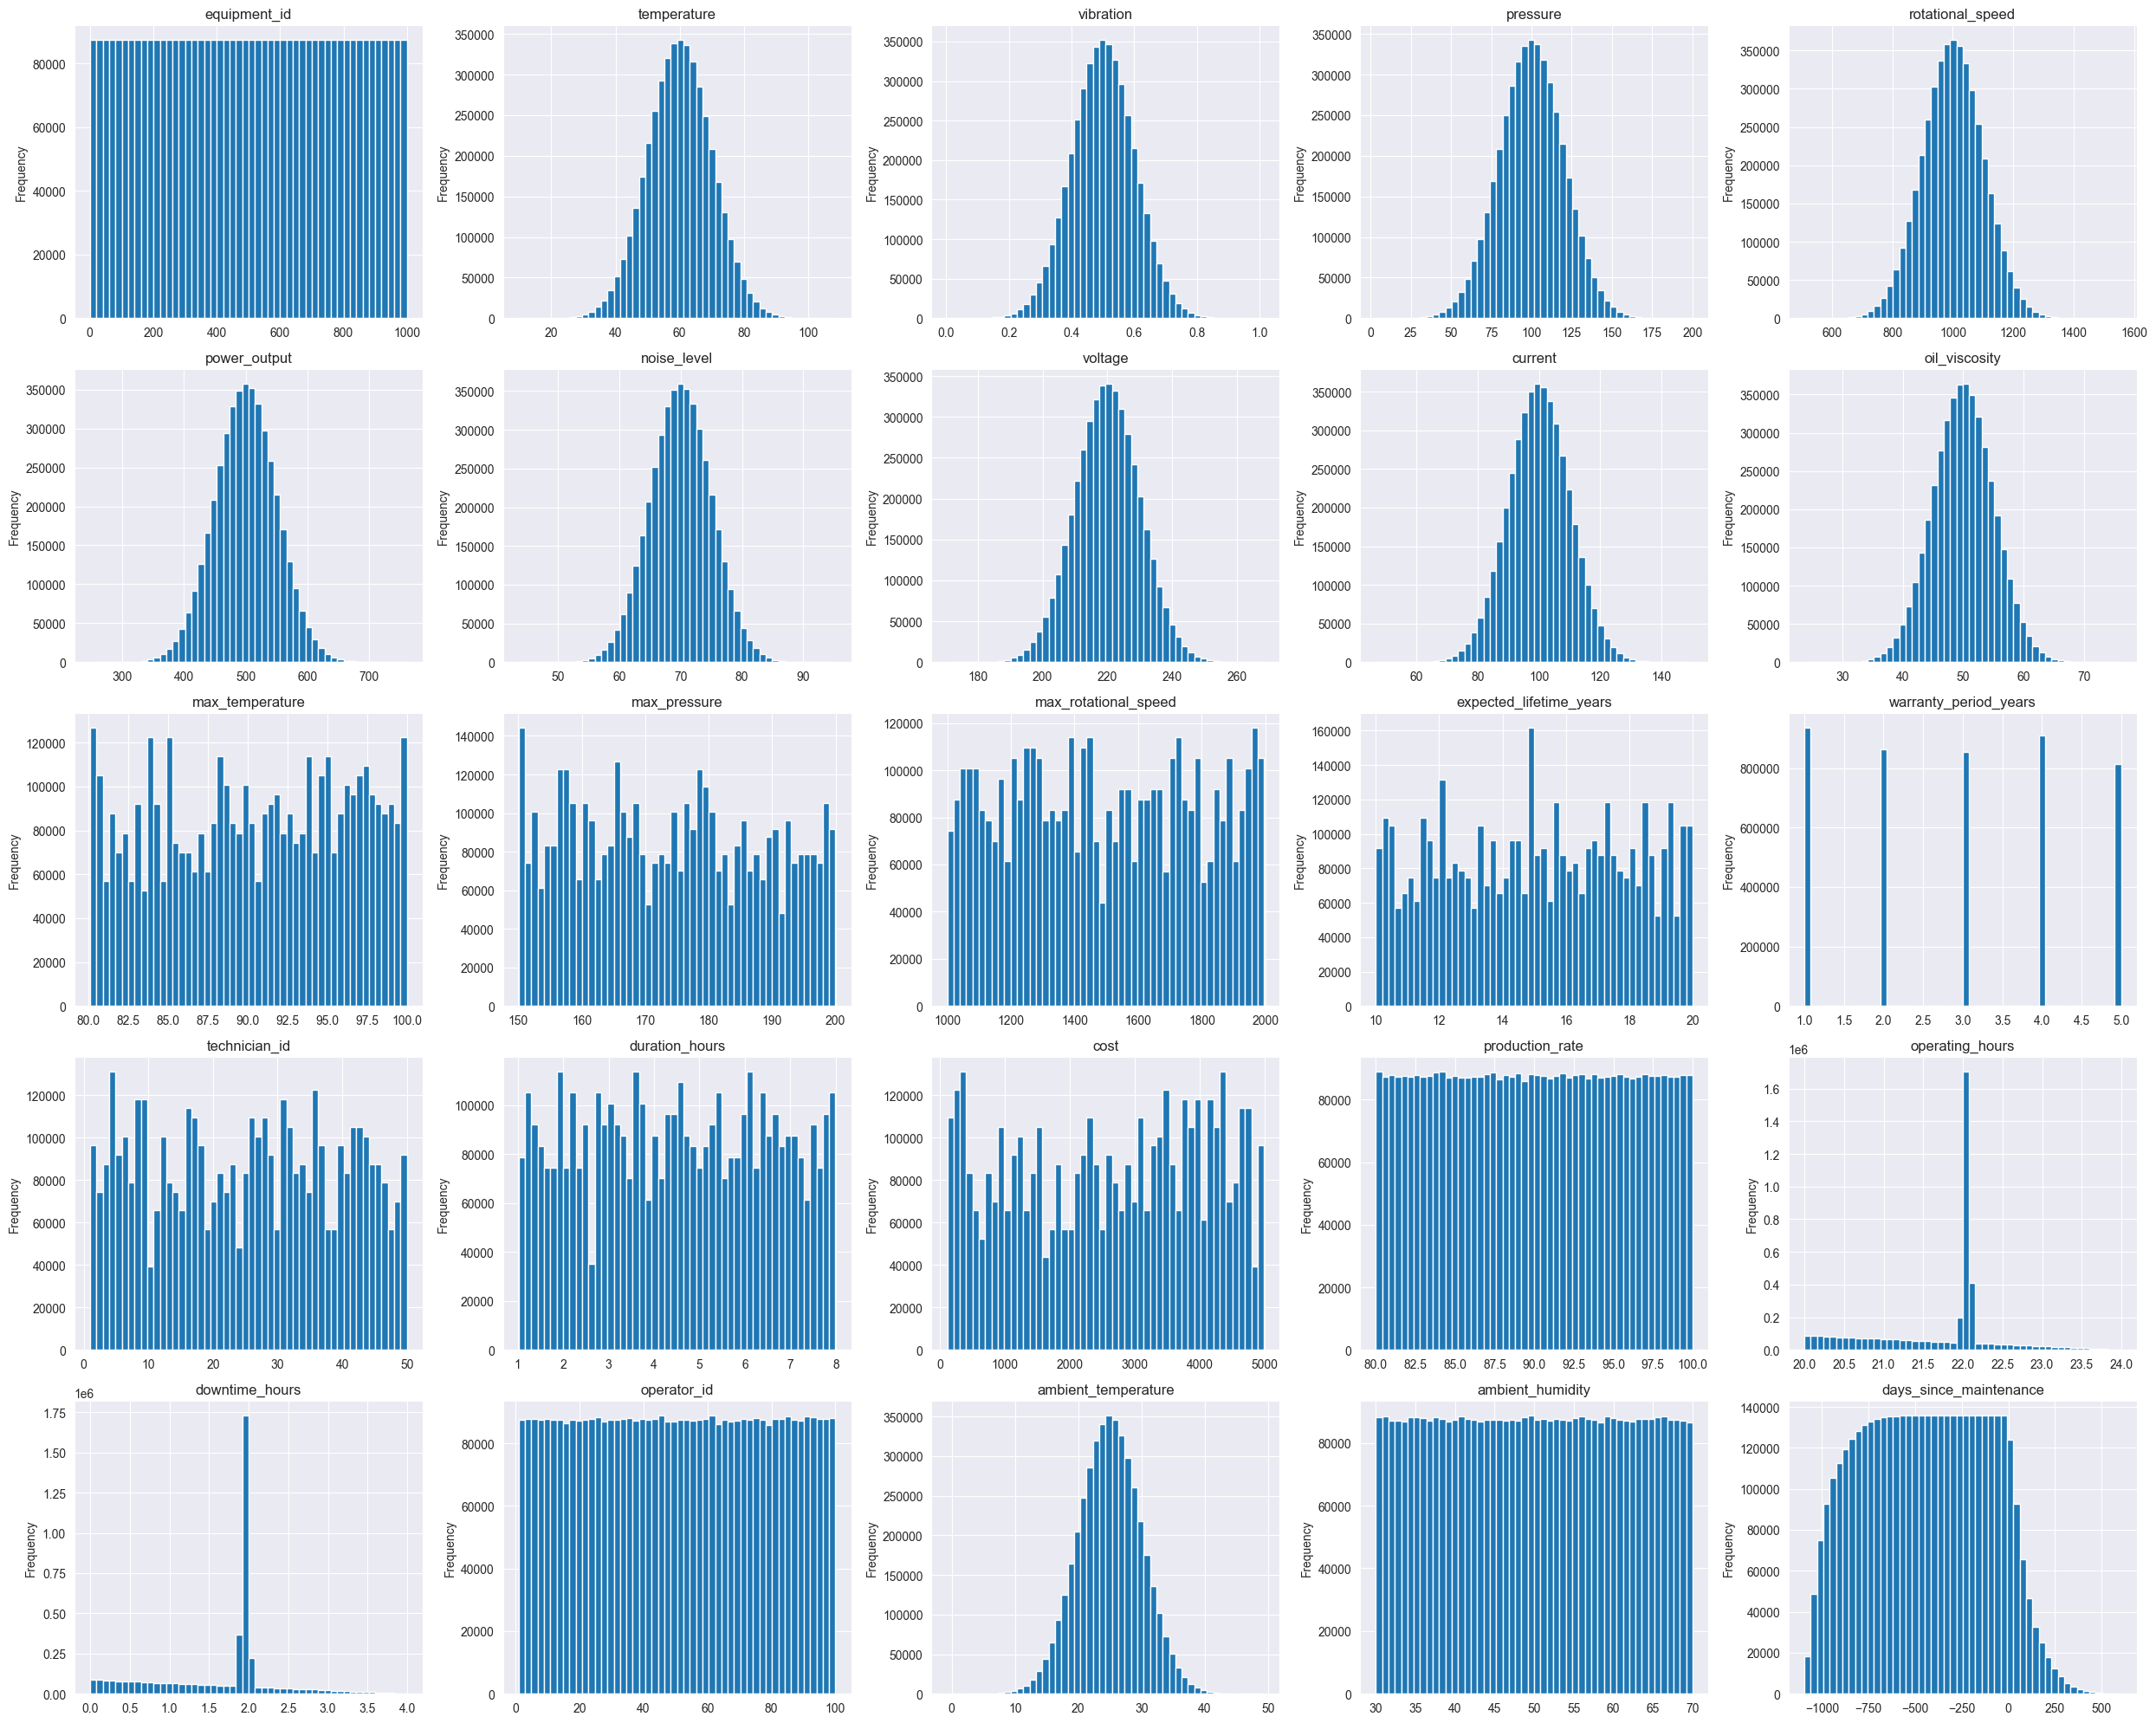

Displaying box plots for numerical features...


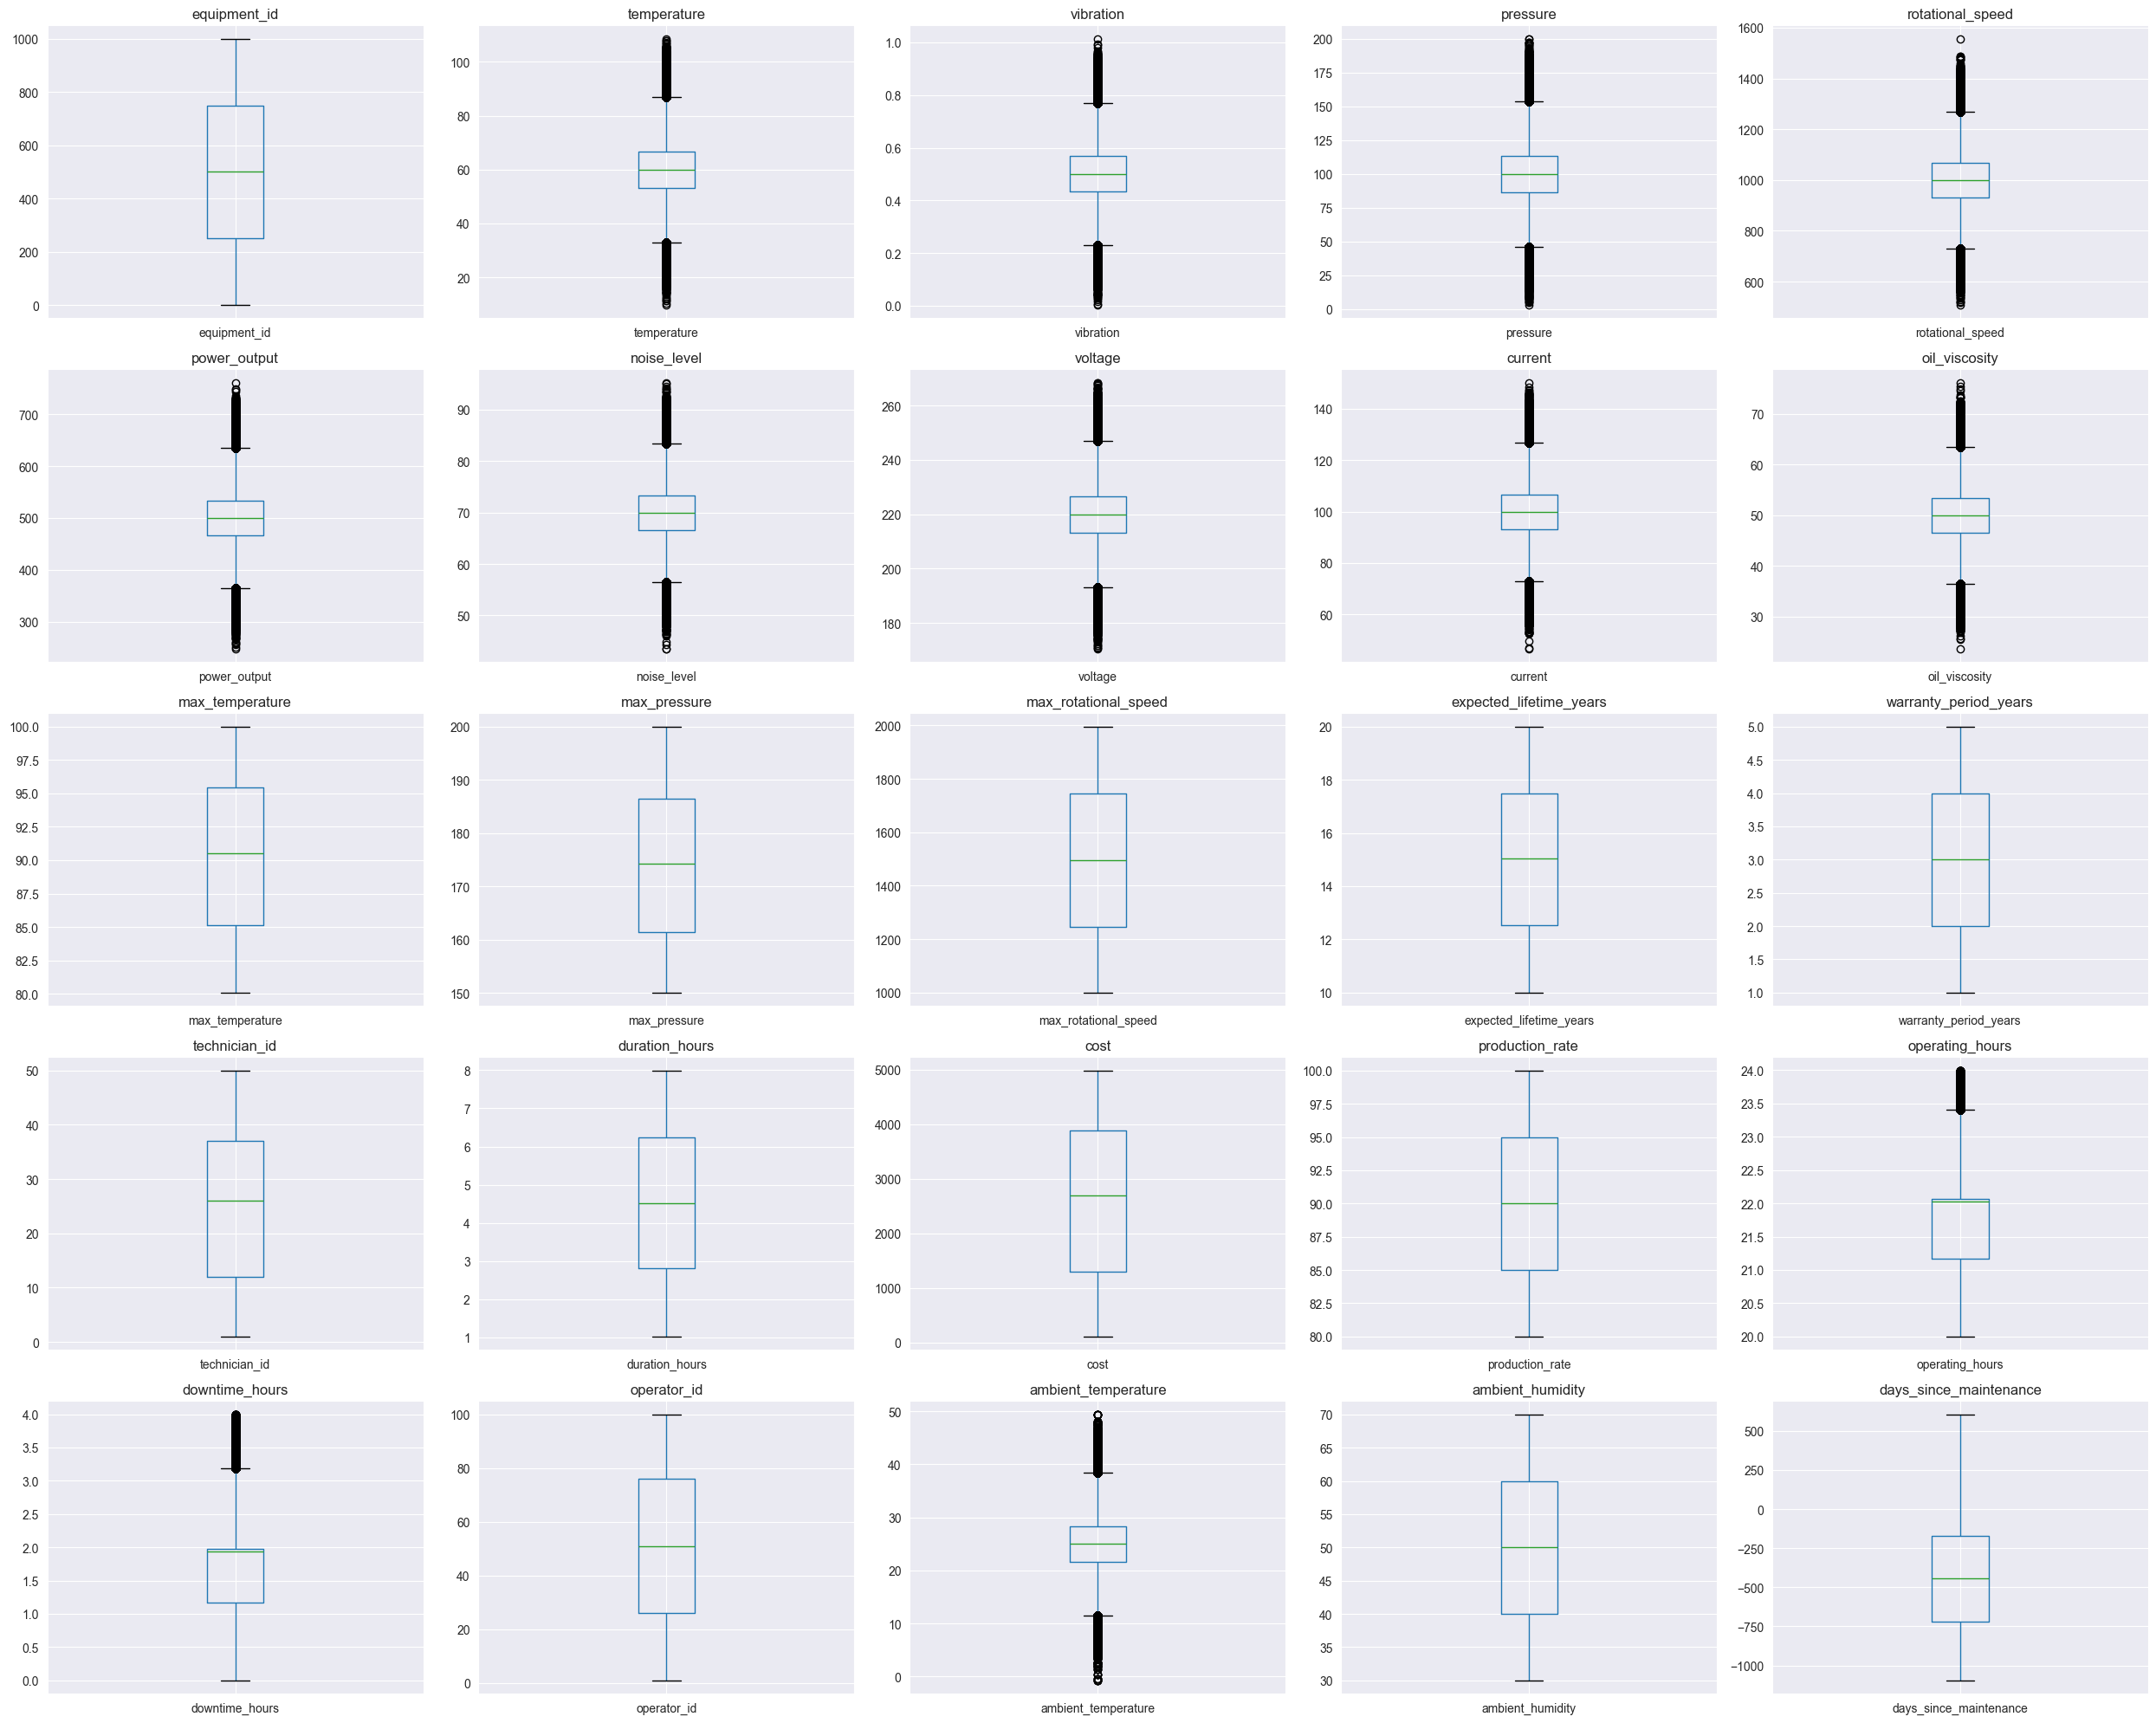

Displaying bar charts for categorical variables...


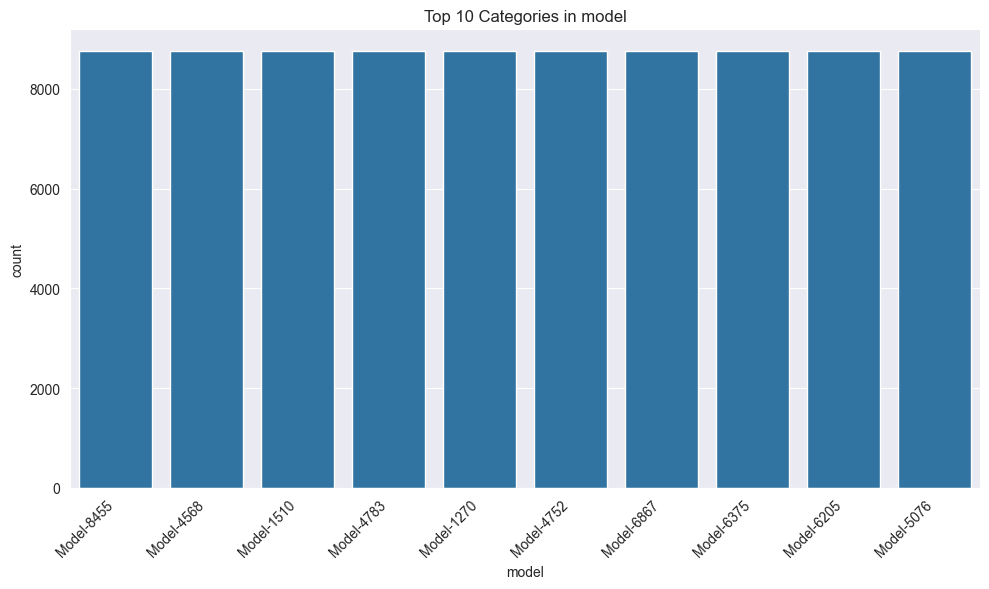

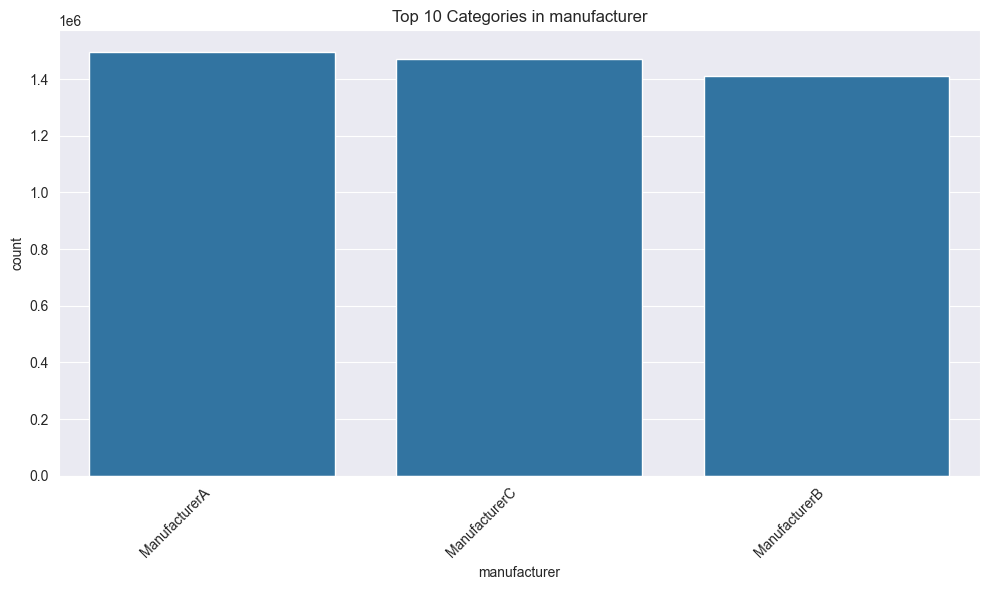

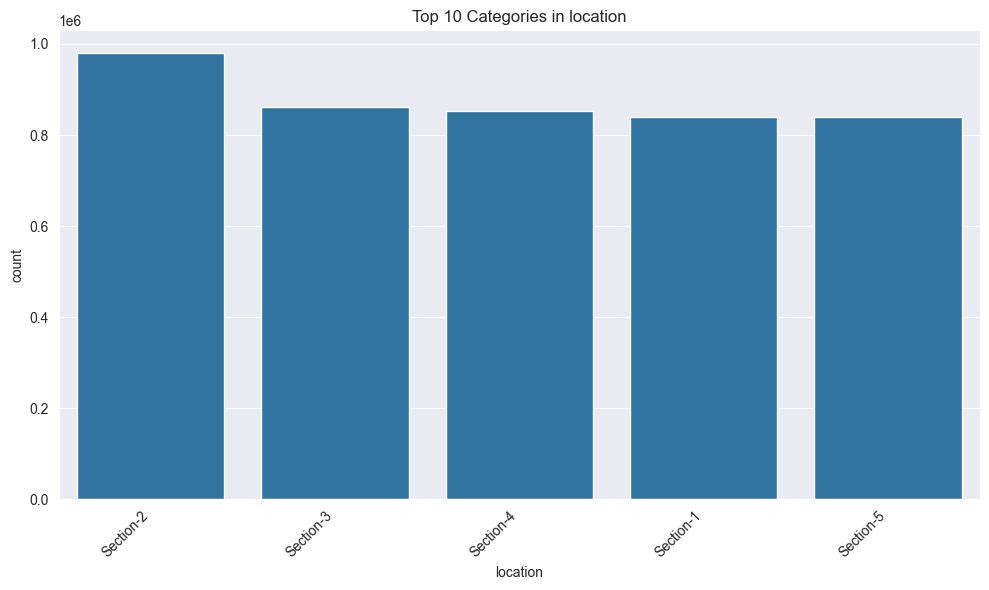

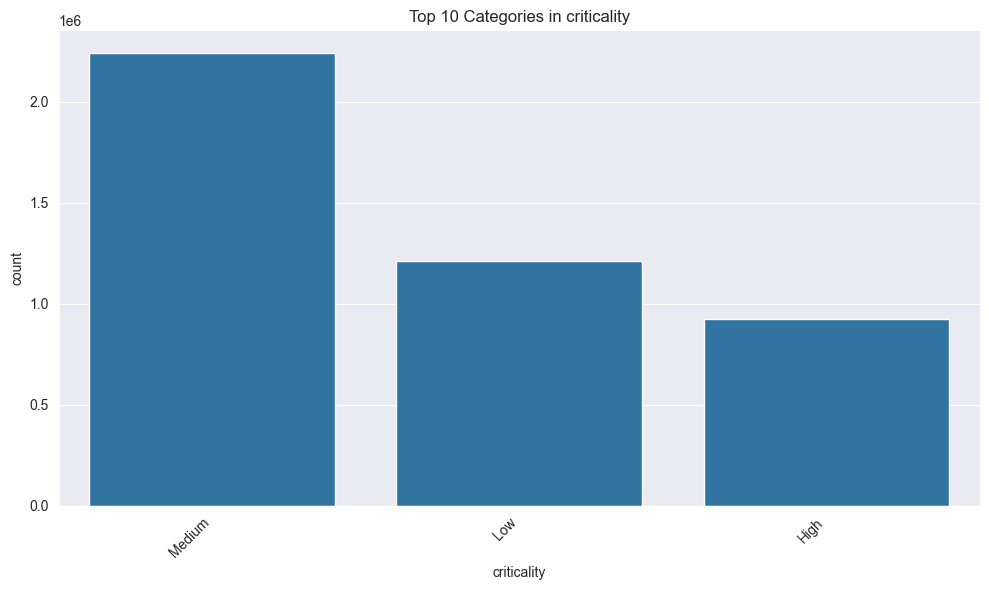

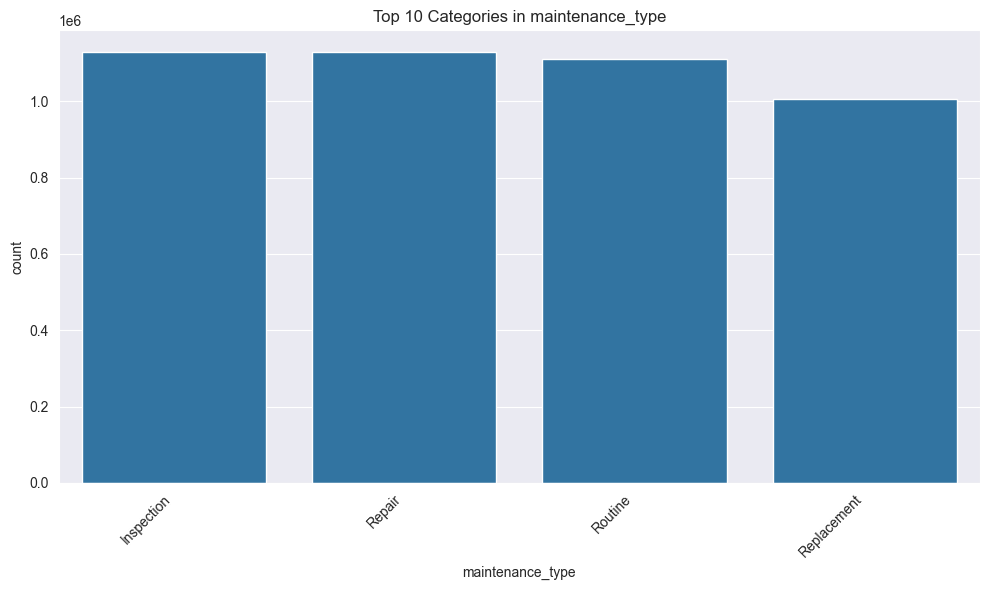

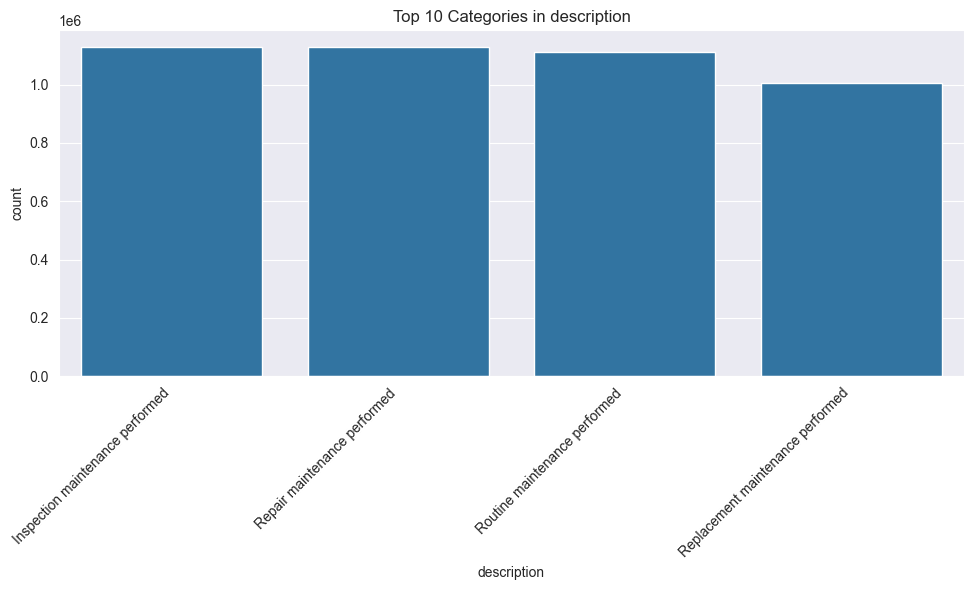

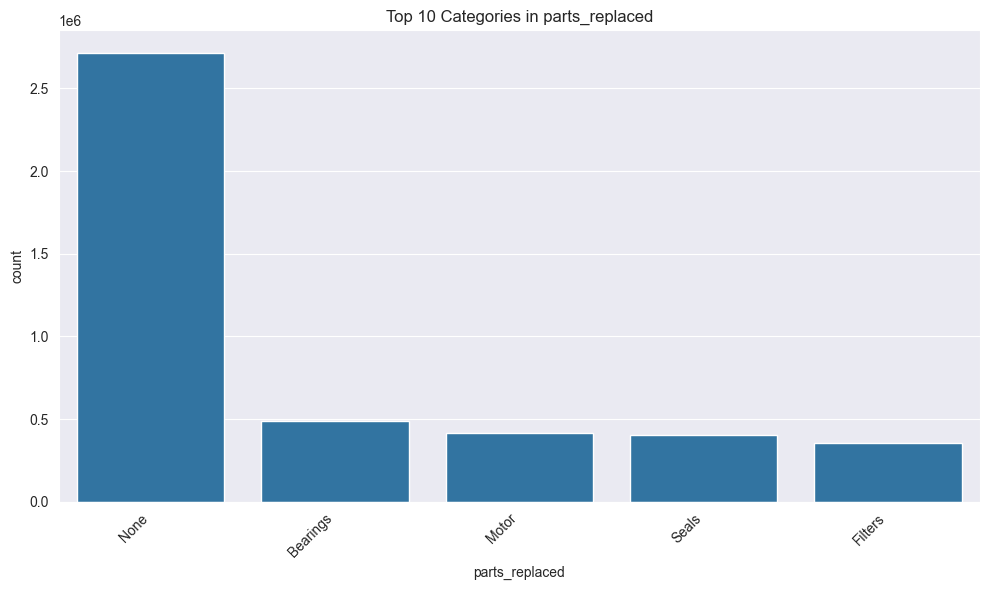

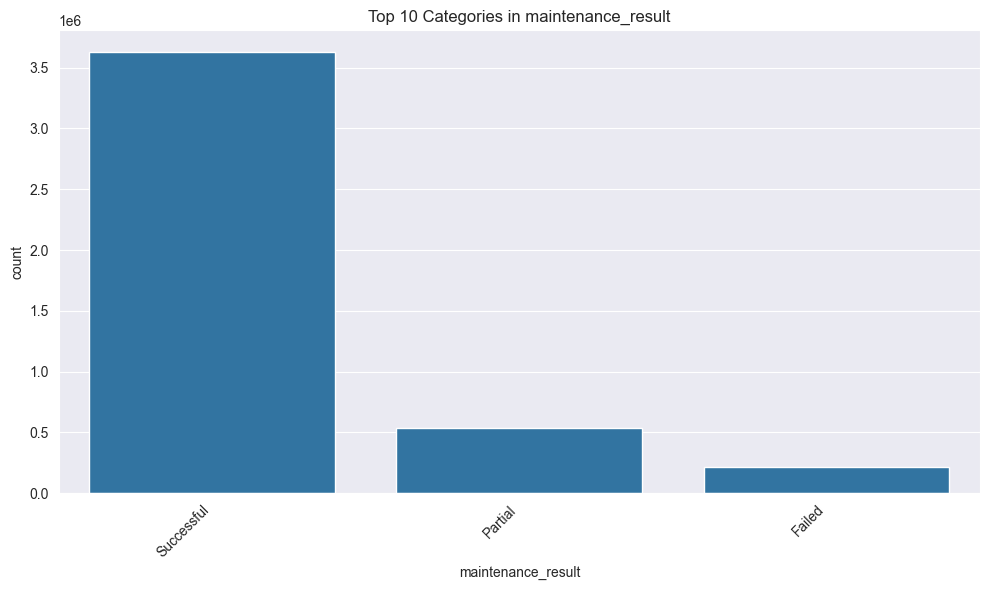

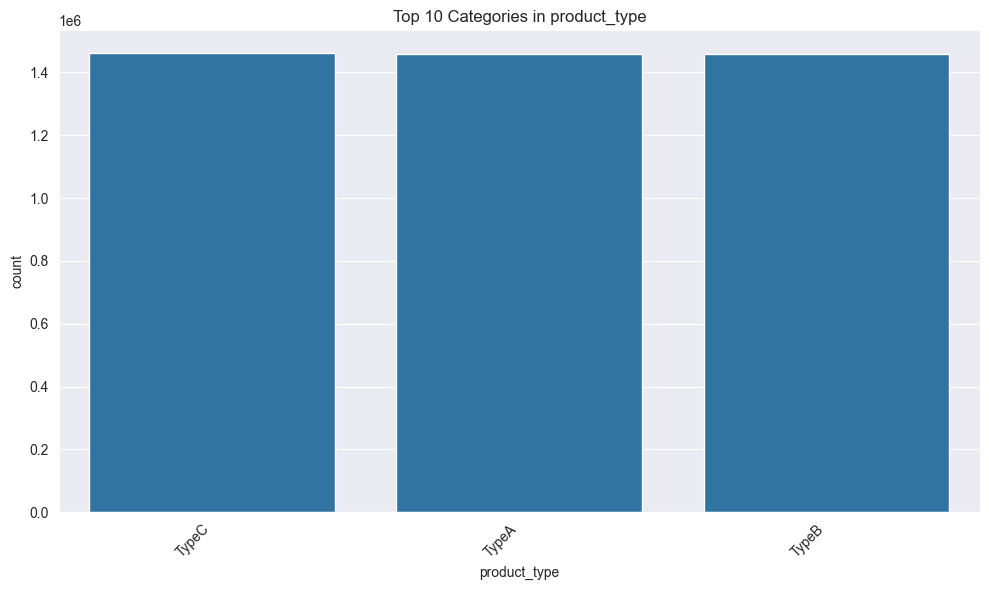

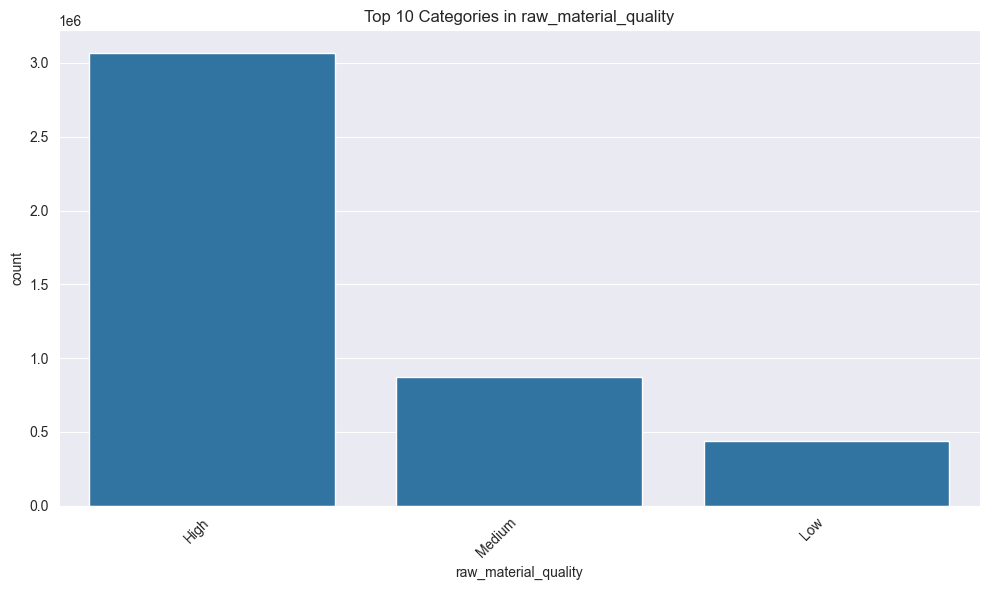

ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "C:\Users\KhanhChang\AppData\Local\Programs\Python\Python312\Lib\site-packages\py4j\clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
                          ^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: reentrant call inside <_io.BufferedReader name=6132>

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\KhanhChang\AppData\Local\Programs\Python\Python312\Lib\site-packages\py4j\java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\KhanhChang\AppData\Local\Programs\Python\Python312\Lib\site-packages\py4j\clientserver.py", line 539, in send_command
    raise Py4JNetworkError(
py4j.protocol.Py4JNetworkError: Error while sending or receiving
ERROR:root:Exception while sending command.
Traceb

Py4JError: An error occurred while calling o6883.count

In [82]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, mean, stddev, min, max
from pyspark.sql.types import NumericType, StringType
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

def create_spark_session():
    return SparkSession.builder \
        .appName("DistributionAnalysis") \
        .getOrCreate()

def load_data(spark, file_path):
    return spark.read.csv(file_path, header=True, inferSchema=True)

def remove_null_rows(df):
    return df.dropna()

def get_numeric_columns(df):
    return [f.name for f in df.schema.fields if isinstance(f.dataType, NumericType)]

def get_categorical_columns(df):
    return [f.name for f in df.schema.fields if isinstance(f.dataType, StringType)]

def plot_histograms(df, numeric_columns):
    pdf = df.select(numeric_columns).toPandas()
    num_cols = len(numeric_columns)
    nrows = math.ceil(math.sqrt(num_cols))
    ncols = math.ceil(num_cols / nrows)
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5, nrows*4))
    axes = axes.flatten()
    
    for i, col in enumerate(numeric_columns):
        if i < len(axes):
            pdf[col].hist(ax=axes[i], bins=50)
            axes[i].set_title(col)
            axes[i].set_ylabel('Frequency')
    
    # Remove any unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

def plot_boxplots(df, numeric_columns):
    pdf = df.select(numeric_columns).toPandas()
    num_cols = len(numeric_columns)
    nrows = math.ceil(math.sqrt(num_cols))
    ncols = math.ceil(num_cols / nrows)
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5, nrows*4))
    axes = axes.flatten()
    
    for i, col in enumerate(numeric_columns):
        if i < len(axes):
            pdf.boxplot(column=col, ax=axes[i])
            axes[i].set_title(col)
    
    # Remove any unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()


def identify_outliers(df, numeric_columns):
    outliers = {}
    for column in numeric_columns:
        stats = df.select(mean(col(column)).alias('mean'),
                          stddev(col(column)).alias('stddev')).collect()[0]
        mean_val, stddev_val = stats['mean'], stats['stddev']
        lower_bound = mean_val - 3 * stddev_val
        upper_bound = mean_val + 3 * stddev_val
        
        outlier_count = df.filter((col(column) < lower_bound) | (col(column) > upper_bound)).count()
        outliers[column] = outlier_count
    
    return outliers

def main():
    spark = create_spark_session()
    
    try:
        # Load data
        file_path = 'C:/Users/KhanhChang/PycharmProjects/Predictive-Maintenance-System-using-Apache-Spark/Datasets/integrated_data.csv'
        df = load_data(spark, file_path)
        
        # Remove rows with null values
        df_cleaned = remove_null_rows(df)
        
        numeric_columns = get_numeric_columns(df_cleaned)
        categorical_columns = get_categorical_columns(df_cleaned)
        
        # Create and display histograms for numerical features
        print("Displaying histograms for numerical features...")
        plot_histograms(df_cleaned, numeric_columns)
        
        # Create and display box plots for numerical features
        print("Displaying box plots for numerical features...")
        plot_boxplots(df_cleaned, numeric_columns)
        
        # Identify outliers
        outliers = identify_outliers(df_cleaned, numeric_columns)
        print("\nOutlier counts (using 3 standard deviations from mean as threshold):")
        for column, count in outliers.items():
            print(f"{column}: {count} outliers")
        
    finally:
        spark.stop()

if __name__ == "__main__":
    main()

Null value counts:
temperature: 0
vibration: 0
pressure: 0
rotational_speed: 0
power_output: 0
noise_level: 0
voltage: 0
current: 0
oil_viscosity: 0
max_temperature: 0
max_pressure: 0
max_rotational_speed: 0
expected_lifetime_years: 0
duration_hours: 0
cost: 0
production_rate: 2000
operating_hours: 2000
downtime_hours: 2000
ambient_temperature: 2000
ambient_humidity: 2000


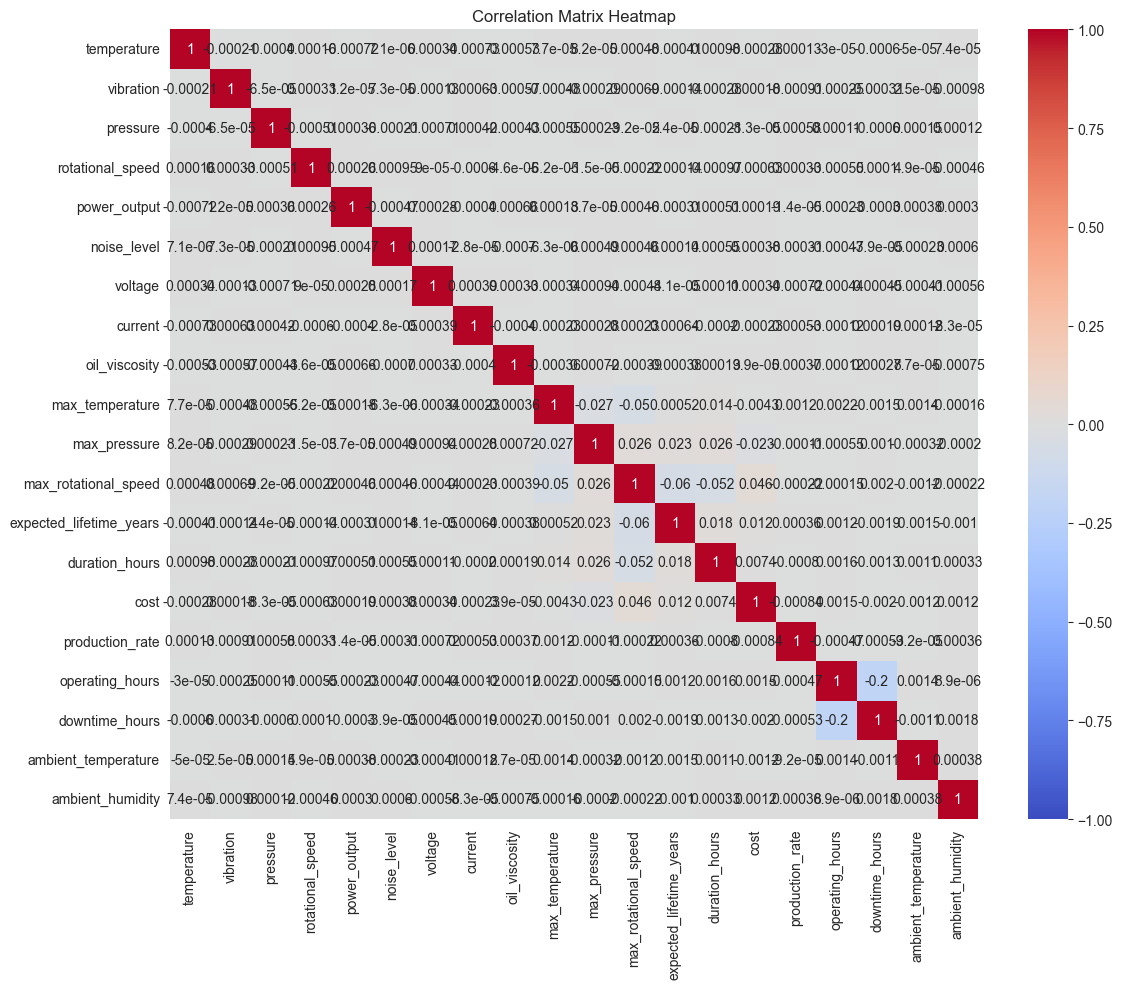


Strong correlations (|correlation| > 0.7):
No strong correlations found.


In [4]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
from pyspark.sql.functions import col, isnan, when, count, isnull
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create Spark session
spark = SparkSession.builder.appName("CorrelationAnalysis").getOrCreate()

# Load your data (replace with your actual data path)
df = spark.read.csv("C:/Users/KhanhChang/PycharmProjects/Predictive-Maintenance-System-using-Apache-Spark/Datasets/integrated_data.csv", header=True, inferSchema=True)

# Function to get numeric columns
def get_numeric_columns(df):
    return [f.name for f in df.schema.fields if f.dataType.typeName() in ["double", "int", "long", "float"]]

# Select only numeric columns
numeric_columns = get_numeric_columns(df)

# Check for null values
null_counts = df.select([count(when(col(c).isNull() | isnan(c), c)).alias(c) for c in numeric_columns]).collect()[0]
print("Null value counts:")
for col, count in zip(numeric_columns, null_counts):
    print(f"{col}: {count}")

# Remove rows with null values
df_cleaned = df.dropna(subset=numeric_columns)

# Create vector column of features
vector_col = "correlation_features"
assembler = VectorAssembler(inputCols=numeric_columns, outputCol=vector_col, handleInvalid="skip")
df_vector = assembler.transform(df_cleaned).select(vector_col)

# Compute correlation matrix
matrix = Correlation.corr(df_vector, vector_col).collect()[0][0]
correlation_matrix = matrix.toArray().tolist()

# Convert to pandas DataFrame for easier manipulation and visualization
pdf = pd.DataFrame(correlation_matrix, columns=numeric_columns, index=numeric_columns)

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(pdf, annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

# Identify strong correlations
strong_correlations = []
for i in range(len(numeric_columns)):
    for j in range(i+1, len(numeric_columns)):
        if abs(correlation_matrix[i][j]) > 0.7:  # You can adjust this threshold
            strong_correlations.append((numeric_columns[i], numeric_columns[j], correlation_matrix[i][j]))

# Print strong correlations
print("\nStrong correlations (|correlation| > 0.7):")
for corr in strong_correlations:
    print(f"{corr[0]} - {corr[1]}: {corr[2]:.2f}")

# Optionally, create a heatmap of only strong correlations
if strong_correlations:
    strong_corr_df = pd.DataFrame(strong_correlations, columns=['Feature1', 'Feature2', 'Correlation'])
    strong_corr_matrix = strong_corr_df.pivot(index='Feature1', columns='Feature2', values='Correlation')
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(strong_corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0)
    plt.title("Strong Correlations Heatmap")
    plt.tight_layout()
    plt.show()
else:
    print("No strong correlations found.")

# Stop Spark session
spark.stop()